In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Apple-Fitness-Data.csv")

In [3]:
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [8]:
df.columns

Index(['Date', 'Time', 'Step Count', 'Distance', 'Energy Burned',
       'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed',
       'Datetime', 'Hour', 'Day'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


In [5]:
df.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [6]:
df.describe()

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
std,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368
min,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000


In [7]:
#  Feature Engineering
# Convert Date and Time columns to datetime format

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.date

In [9]:
df

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,Datetime,Hour,Day
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060,2023-03-21 16:01:23,16,2023-03-21
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852,2023-03-21 16:18:37,16,2023-03-21
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996,2023-03-21 16:31:38,16,2023-03-21
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040,2023-03-21 16:45:37,16,2023-03-21
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184,2023-03-21 17:10:30,17,2023-03-21
...,...,...,...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364,2023-04-01 16:04:23,16,2023-04-01
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400,2023-04-01 16:33:18,16,2023-04-01
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292,2023-04-01 16:49:49,16,2023-04-01
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860,2023-04-01 17:09:06,17,2023-04-01


In [10]:
# New Features
df['Energy_per_step'] = df['Energy Burned'] / df['Step Count'].replace(0, np.nan)
df['Double_Support_Deviation'] = df['Walking Double Support Percentage'].diff().fillna(0)
daily_distance = df.groupby('Day')['Distance'].sum().rename("Total_Distance")
df = df.merge(daily_distance, on='Day', how='left')
avg_speed_per_hour = df.groupby(['Day', 'Hour'])['Walking Speed'].mean().rename("Avg_Walking_Speed")
df = df.merge(avg_speed_per_hour, on=['Day', 'Hour'], how='left')

In [11]:
df

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,Datetime,Hour,Day,Energy_per_step,Double_Support_Deviation,Total_Distance,Avg_Walking_Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060,2023-03-21 16:01:23,16,2023-03-21,0.317826,0.000,0.94847,3.987
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852,2023-03-21 16:18:37,16,2023-03-21,0.022825,0.005,0.94847,3.987
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996,2023-03-21 16:31:38,16,2023-03-21,1.043071,-0.031,0.94847,3.987
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040,2023-03-21 16:45:37,16,2023-03-21,1.139308,0.000,0.94847,3.987
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184,2023-03-21 17:10:30,17,2023-03-21,0.891353,0.003,0.94847,5.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364,2023-04-01 16:04:23,16,2023-04-01,0.151287,-0.008,2.43079,5.352
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400,2023-04-01 16:33:18,16,2023-04-01,0.111757,-0.003,2.43079,5.352
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292,2023-04-01 16:49:49,16,2023-04-01,0.032421,-0.021,2.43079,5.352
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860,2023-04-01 17:09:06,17,2023-04-01,0.020703,0.008,2.43079,4.950


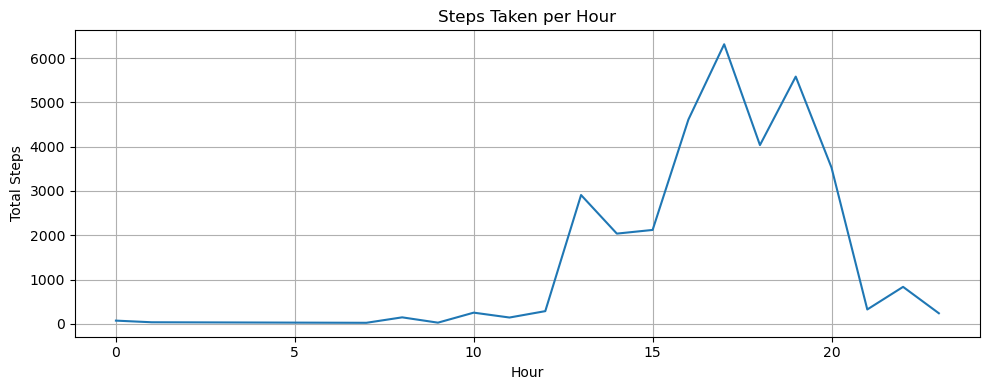

In [12]:
#  Data Visualization
plt.figure(figsize=(10, 4))
df.groupby('Hour')['Step Count'].sum().plot()
plt.title("Steps Taken per Hour")
plt.xlabel("Hour")
plt.ylabel("Total Steps")
plt.grid(True)
plt.tight_layout()
plt.show()

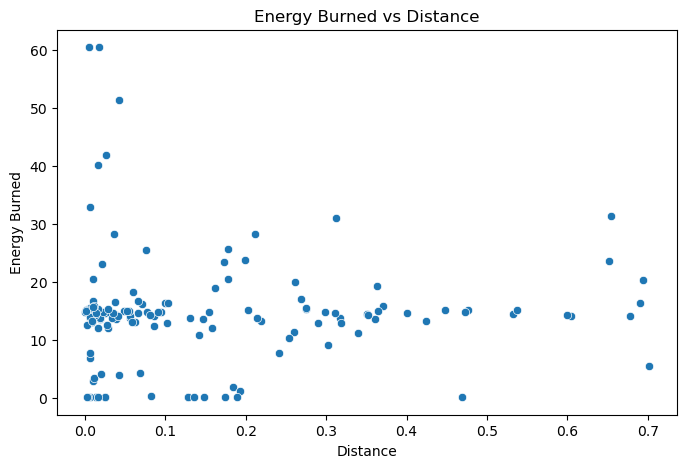

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Distance', y='Energy Burned')
plt.title("Energy Burned vs Distance")
plt.show()

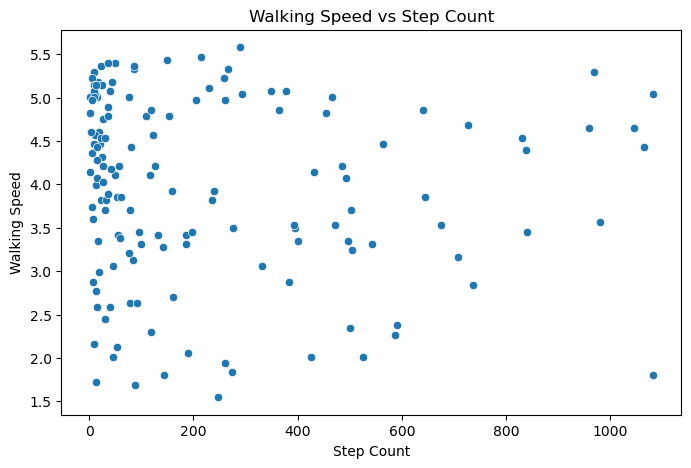

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Step Count', y='Walking Speed')
plt.title("Walking Speed vs Step Count")
plt.show()

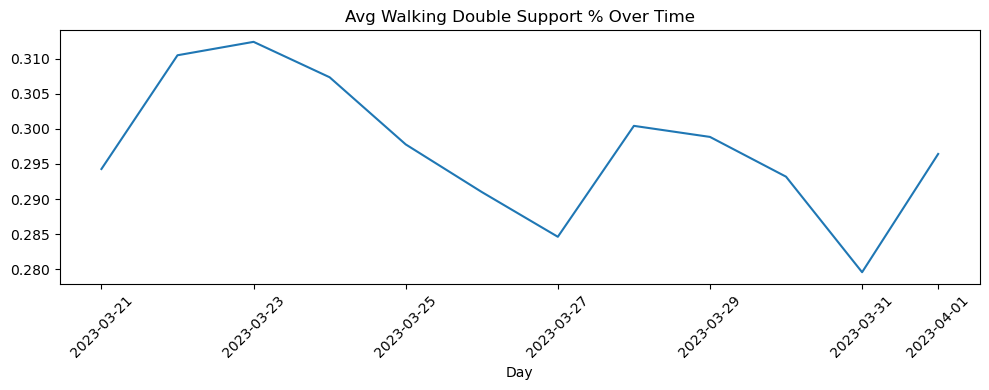

In [15]:
plt.figure(figsize=(10, 4))
df.groupby('Day')['Walking Double Support Percentage'].mean().plot()
plt.title("Avg Walking Double Support % Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()